In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [10]:
df = pd.read_excel('w4-40-polaron-v3.xlsx')
df2 = pd.read_excel('w4-40-equal-v4.xlsx')

In [11]:
l = list(range(2,30))+list(range(30,100,5))+list(range(105,156,5))+[159]

# Полярон

In [12]:
mu1, h1 = [], []
for i in l:
    mu = (df[(df['Nup_total']==i+1) & (df['Ndown_total']==1)]['E'].values[0] - df[(df['Nup_total']==i) & (df['Ndown_total']==0)]['E'].values[0])/2
    h = (df[(df['Nup_total']==i-1) & (df['Ndown_total']==1)]['E'].values[0] - df[(df['Nup_total']==i) & (df['Ndown_total']==0)]['E'].values[0])/-2
    mu1.append(mu)
    h1.append(h)

# Равные

In [13]:
df2_list = list(range(2,30))+list(range(30,81,5))

In [14]:
mu_, h_ = [], []
for i in df2_list:
    mu = (df2[(df2['Nup_total']==i+1) & (df2['Ndown_total']==i+1)]['E'].values[0] - df2[(df2['Nup_total']==i) & (df2['Ndown_total']==i)]['E'].values[0])/2
    h = (df2[(df2['Nup_total']==i+1) & (df2['Ndown_total']==i-1)]['E'].values[0] - df2[(df2['Nup_total']==i) & (df2['Ndown_total']==i)]['E'].values[0])/2
    mu_.append(mu)
    h_.append(h)

# Доп.Линии

In [15]:
e11 = df[(df['Nup_total']==1) & (df['Ndown_total']==1)]['E'].values[0]
e10 = df[(df['Nup_total']==159) & (df['Ndown_total']==0)]['E'].values[0]

def mu(h):
    return -h +e10

def mu3(h):
    return -h - e10

h = np.arange(h1[0], 10, 0.1)
h3 = np.arange(6.5, 10, 0.1)

# График

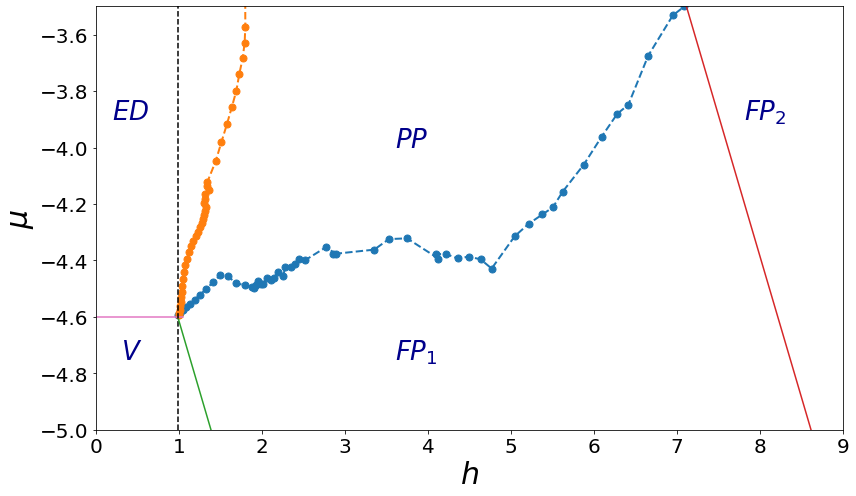

In [67]:
plt.figure(figsize=(12, 7))
# ['', '', '', ''
kwds = dict(ls='--', marker='o', lw=2, markersize=7)
plt.plot(h1, mu1, '-', color='#1f77b4', **kwds)
plt.plot(h_, mu_, color='#ff7f0e', **kwds)
plt.axhline(y=(e11/2), color='#e377c2', xmax = h1[0]/8.5, ls='-') 
plt.axvline(x=h1[0], color='black', ls='--')
plt.plot(h, mu(h), '-', color = '#2ca02c', ls='-')
plt.plot(h3, mu3(h3), '-', color = '#d62728')
plt.axis([0, 9, -5.0, -3.5])
plt.text(0.2, -3.9, r'$ED$', fontsize=26, color='darkblue')
# plt.text(0.1, -4.85, r'$N_{\uparrow} = 0$', fontsize=20, color='darkblue')
# plt.text(0.1, -4.95, r'$N_{\downarrow} = 0$', fontsize=20, color='darkblue')
plt.text(0.3, -4.75, r'$V$', fontsize=26, color='darkblue')
plt.text(3.6, -4.0, r'$PP$', fontsize=26, color='darkblue')
plt.text(3.6, -4.75, r'$FP_1$', fontsize=26, color='darkblue')
plt.text(7.8, -3.9, r'$FP_2$', fontsize=26, color='darkblue')
plt.xlabel('$h$', fontsize=30)
plt.ylabel(r'$\mu$', fontsize=30)
plt.gca().xaxis.set_tick_params(labelsize=20)
plt.gca().yaxis.set_tick_params(labelsize=20)
plt.tight_layout()
# plt.show()
plt.savefig('W4.png')